In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import matplotlib
import squarify
import re

In [2]:
battles = pd.read_csv("/Users/lauurasarabia/Ironhack/projects/Project-2/data/battles.csv")
battles

,Unnamed: 0,Name,Reign,Date,Belt,DOB,Horoscope,Defeated,Defeated_Horoscope
0,0,Bruno Sammartino,1,17-May-63,WWE Championship,06/10,Libra,Buddy Rogers,Pisces
1,1,Ivan Koloff,1,18-Jan-71,WWE Championship,25/08,Virgo,Bruno Sammartino,Libra
2,2,Pedro Morales,1,8-Feb-71,WWE Championship,22/10,Libra,Ivan Koloff,Virgo
3,3,Stan Stasiak,1,1-Dec-73,WWE Championship,13/04,Aries,Pedro Morales,Libra
4,4,Bruno Sammartino,2,10-Dec-73,WWE Championship,06/10,Libra,Stan Stasiak,Aries
...,...,...,...,...,...,...,...,...,...
80,80,Sheamus,1,14-Mar-11,WWE United States Championship,28/01,Aquarius,John Cena,Taurus
81,81,John Cena,4,29-Mar-15,WWE United States Championship,23/04,Taurus,Randy Orton,Aries
82,82,John Cena,5,20-Sep-15,WWE United States Championship,23/04,Taurus,Randy Orton,Aries
83,83,Chris Jericho,1,9-Jan-17,WWE United States Championship,09/11,Scorpio,Steve Austin,Sagittarius


# Top 5 Classification🔝

<AxesSubplot: xlabel='Name'>

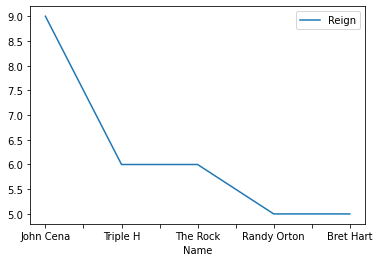

In [3]:
maxreign = battles[["Name", "Reign"]].groupby(by="Name").agg("max").sort_values(by=["Reign"], ascending=False)
maxreign = maxreign.head(5)
maxreign.plot(legend=True)

In [4]:
battles.sort_values(by=["Reign"], ascending=False, inplace=True)
battles.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
battles.reset_index(drop=True, inplace=True)

# Wins by horoscopes🔮

<AxesSubplot: title={'center': 'Wins by horoscopes'}>

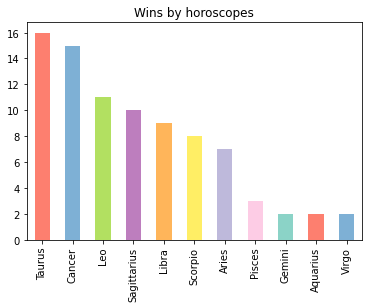

In [20]:
battles["Horoscope"].value_counts().plot(kind="bar", color=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"], title="Wins by horoscopes")

# Comparing horoscope compatibility from our top battles:

In [17]:
horoscopes_compatibility = battles.head(5)
horoscopes_compatibility

,Name,Reign,Date,Belt,DOB,Horoscope,Defeated,Defeated_Horoscope
0,John Cena,9,25-Jul-11,WWE Championship,23/04,Taurus,Rey Mysterio,Sagittarius
1,The Rock,6,25-Feb-01,WWE Championship,02/05,Taurus,Kurt Angle,Sagittarius
2,Triple H,6,7-Oct-07,WWE Championship,27/07,Leo,Randy Orton,Aries
3,Bret Hart,5,17-May-10,WWE United States Championship,02/07,Cancer,The Undertaker,Aries
4,Randy Orton,5,4-Oct-09,WWE Championship,01/04,Aries,John Cena,Taurus


# John Cena vs Rey Mysterio / The Rock vs Kurt Angle

In [38]:
url_3 = "https://thoughtcatalog.com/january-nelson/2021/03/taurus-and-sagittarius/#:~:text=These%20zodiac%20signs%20are%20complete,be%20honest%20about%20their%20boundaries."

In [39]:
html = requests.get(url_3)

<Response [200]>

In [40]:
soup = BeautifulSoup(html.content, "html.parser")

In [47]:
tags = soup.find_all("p", attrs = {"class":"p2"})
text = tags[6].getText()
text

'Taurus Sagittarius love is complicated. These two signs (an earth and fire) live life in a completely different way. The life Taurus lives is safe and predictable. Meanwhile, a Sagittarius leads an exciting, high energy life. Overall, they make a poor love match.'

![JohnCenaTheRock](https://img.republicworld.com/republic-prod/stories/promolarge/xhdpi/aeqilftyemiqcvrp_1587634007.jpeg)

In [57]:
loveapi = pd.read_csv('/Users/lauurasarabia/Ironhack/projects/Project-2/data/loveapi.csv')
loveapi.sort_values(by=["Reign"], ascending=False, inplace=True)
loveapi.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)

In [59]:
loveapi.head(2)

,Name,Reign,Date,Belt,DOB,Horoscope,Defeated,Defeated_Horoscope,Love_Percentage
64,John Cena,9,25-Jul-11,WWE Championship,23/04,Taurus,Rey Mysterio,Sagittarius,Not a good choice.
42,The Rock,6,25-Feb-01,WWE Championship,02/05,Taurus,Kurt Angle,Sagittarius,Not a good choice.
